In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('duzce_cleaned_data.csv')

In [3]:
df

,Building_height,Building_age,Torsional_irregularity,Projection_in_plan,Minimum_normalized_lateral_stiffness_index,Minimum_normalized_lateral_strength_index,Overhanging_ratio,Normalized_redundancy_score,Priority_index,PGA,PGV/PGA,Effective_SaT1,Class
0,12.00,24.0,1,2,0.091896,3.005807,0.114932,1,0.013702,1.195908,0.074858,0.897751,M
1,11.20,19.0,2,2,0.079054,2.256757,0.152568,2,0.010158,1.195908,0.074858,0.916526,M
2,11.20,8.0,2,2,0.068851,1.717742,0.202016,1,0.007218,1.195908,0.074858,0.754786,M
3,16.20,14.0,2,2,0.043574,1.690346,0.071803,2,0.005137,1.195908,0.074858,0.604847,M
4,16.20,14.0,2,2,0.036941,1.207469,0.120498,1,0.009077,1.195908,0.074858,0.604847,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...
478,8.55,18.0,2,2,0.053323,2.306667,0.039771,3,0.020086,1.195908,0.074858,0.868699,M
479,11.20,3.0,1,2,0.158659,2.896653,0.075902,1,0.010472,1.195908,0.074858,0.754786,M
480,11.20,5.0,2,2,0.198931,2.655852,0.170534,2,0.009189,1.195908,0.074858,0.754786,L
481,11.20,5.0,2,2,0.175697,2.605994,0.167368,2,0.009430,1.195908,0.074858,0.754786,L


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [5]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [7]:
y1 = le.fit_transform(y)

In [8]:
y1

array([2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2, 1, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1,
       3, 2, 3, 3, 3, 2, 2, 1, 1, 2, 2, 2, 2, 1, 4, 1, 4, 3, 2, 2, 2, 1,
       2, 3, 2, 1, 1, 2, 4, 4, 2, 2, 4, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 4, 2, 1, 1, 3, 1, 3, 2, 2, 4, 2, 2, 4, 2, 3, 3, 2, 4,
       3, 3, 3, 3, 3, 3, 3, 1, 2, 3, 4, 1, 4, 4, 4, 1, 1, 1, 3, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 4, 1, 2, 3, 3, 3, 3, 1, 2, 4, 4, 4, 3, 3,
       3, 4, 4, 4, 4, 3, 3, 3, 3, 2, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 4, 4, 1, 4, 1, 4, 4, 2,
       1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 4, 4, 4, 1, 1, 1, 4, 1, 1, 1,
       2, 4, 1, 2, 1, 4, 2, 2, 1, 1, 1, 1, 1, 1, 4,

In [9]:
# Transform to the one-hot encoding

y = pd.get_dummies(y1, dtype=int)

In [10]:
y

,0,1,2,3,4
0,0,0,1,0,0
1,0,0,1,0,0
2,0,0,1,0,0
3,0,0,1,0,0
4,0,0,1,0,0
...,...,...,...,...,...
478,0,0,1,0,0
479,0,0,1,0,0
480,0,1,0,0,0
481,0,1,0,0,0


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 56)
#X_train.shape, y_train.shape, X_test.shape, y_test.shape

In [12]:
# Feature scaling shoud be done after data splitting.There should be no influence on test data.

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train.iloc[:,:-1] = sc.fit_transform(X_train.iloc[:,:-1])

#Not using fit method so that model doesn't know the mean and standard deviation of the test dataset
X_test.iloc[:,:-1] = sc.transform(X_test.iloc[:,:-1])

In [13]:
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [14]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(12,)),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(5, activation='softmax')
])

C:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [15]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [16]:
history = model.fit(X_train, y_train, batch_size=30, validation_split=0.2, epochs=50)

Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.2657 - loss: 1.7173 - val_accuracy: 0.2949 - val_loss: 1.7420
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2773 - loss: 1.6878 - val_accuracy: 0.3077 - val_loss: 1.7129
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2728 - loss: 1.6639 - val_accuracy: 0.2949 - val_loss: 1.6861
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2837 - loss: 1.6419 - val_accuracy: 0.3077 - val_loss: 1.6618
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3051 - loss: 1.6216 - val_accuracy: 0.3077 - val_loss: 1.6395
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3089 - loss: 1.6026 - val_accuracy: 0.3077 - val_loss: 1.6187
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3057 - loss: 1.5850 - val_accuracy: 0.3205 - val_loss: 1.5998
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3194 - loss: 1.5691 - val_accuracy: 0.3205 - val_loss

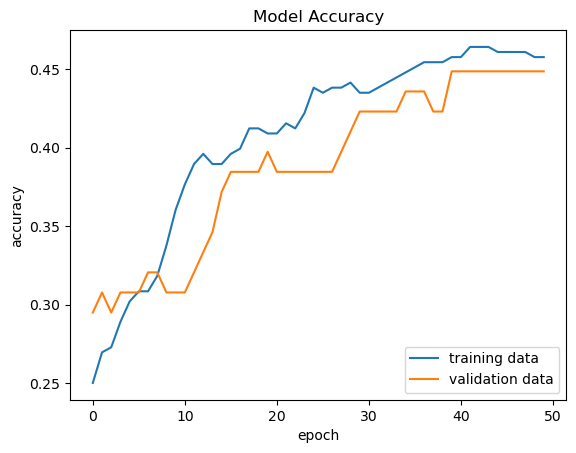

In [17]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc='lower right')

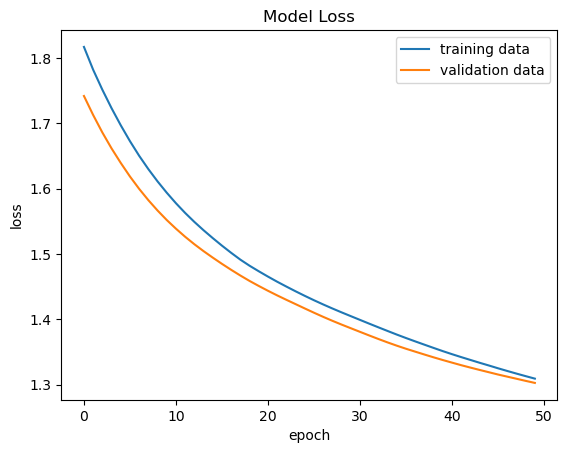

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc='upper right')

In [19]:
y_test

,0,1,2,3,4
97,0,1,0,0,0
167,1,0,0,0,0
66,0,0,1,0,0
442,0,0,1,0,0
294,0,1,0,0,0
...,...,...,...,...,...
47,0,0,0,1,0
204,1,0,0,0,0
223,1,0,0,0,0
389,0,0,0,1,0


In [20]:
y_pred = model.predict(X_test)
y_pred_class = y_pred.argmax(axis=1)
y_test_class = y_test.idxmax(axis=1)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


In [21]:
X_test

,Building_height,Building_age,Torsional_irregularity,Projection_in_plan,Minimum_normalized_lateral_stiffness_index,Minimum_normalized_lateral_strength_index,Overhanging_ratio,Normalized_redundancy_score,Priority_index,PGA,PGV/PGA,Effective_SaT1
97,-2.176411,0.090079,-1.026251,0.340010,-0.622277,-0.077721,0.122539,2.173856,0.144734,-0.698284,-2.736524,0.975957
167,-0.135025,-0.107238,-1.026251,0.340010,0.060195,-0.303897,0.258540,-0.623172,-0.461245,0.017712,-0.070883,0.754786
66,-0.286239,-0.146702,0.974420,0.340010,-0.054469,0.001726,1.428988,-0.623172,-0.914037,0.017712,-0.070883,0.771437
442,0.923472,-0.126970,0.974420,0.340010,0.679002,-0.311285,1.198192,-0.623172,-1.135556,0.017712,-0.070883,0.660204
294,-1.080111,0.021018,0.974420,0.340010,-0.628405,-1.045358,1.081222,0.775342,-1.084468,1.062528,0.284847,0.864178
...,...,...,...,...,...,...,...,...,...,...,...,...
47,0.923472,-0.097373,0.974420,0.340010,-0.632005,-0.412955,0.014771,2.173856,0.292564,0.017712,-0.070883,0.857180
204,0.016189,0.040750,-1.026251,0.340010,-0.287000,0.450925,-0.521539,-0.623172,-1.038896,0.017712,-0.070883,0.906928
223,0.923472,-0.166434,-1.026251,-2.941088,0.165395,-0.310699,-1.809561,-0.623172,-0.801635,0.017712,-0.070883,0.660204
389,-1.193521,0.109811,-1.026251,0.340010,0.595522,2.294978,0.014771,0.775342,1.923114,-0.686366,0.281788,0.873324


In [22]:
y_pred

array([[0.13863935, 0.16923127, 0.20460784, 0.41379857, 0.07372303],
       [0.18115912, 0.2581857 , 0.23975906, 0.12222585, 0.19867018],
       [0.20749561, 0.2929192 , 0.19427414, 0.07545396, 0.22985712],
       [0.3079188 , 0.17543145, 0.17733417, 0.09260409, 0.24671146],
       [0.1475506 , 0.34378454, 0.24743406, 0.03738444, 0.22384636],
       [0.12360699, 0.17686291, 0.40360367, 0.07261616, 0.22331022],
       [0.06535581, 0.39325044, 0.25403798, 0.17349796, 0.11385785],
       [0.17480294, 0.17780118, 0.32521173, 0.09387378, 0.22831027],
       [0.28943336, 0.19168961, 0.24852225, 0.1089252 , 0.16142955],
       [0.16071174, 0.33397976, 0.24728855, 0.09688663, 0.16113333],
       [0.04347757, 0.5834574 , 0.3100156 , 0.03594971, 0.02709965],
       [0.04808617, 0.52476025, 0.17590837, 0.17569025, 0.07555503],
       [0.09805328, 0.42003787, 0.25712407, 0.10337815, 0.12140664],
       [0.19803582, 0.21954004, 0.27790317, 0.08677693, 0.21774407],
       [0.23205261, 0.2186593 , 0.

In [23]:
y_test_class

97     1
167    0
66     2
442    2
294    1
      ..
47     3
204    0
223    0
389    3
126    1
Length: 97, dtype: int32

In [24]:
y_pred_class

array([3, 1, 1, 0, 1, 2, 1, 2, 0, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 2, 2, 1,
       0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 0, 1, 0, 0, 0, 2, 1, 1, 1, 2, 3, 2,
       1, 0, 1, 3, 1, 0, 2, 2, 2, 4, 1, 2, 1, 1, 3, 2, 3, 2, 4, 2, 2, 0,
       4, 2, 1, 1, 1, 1, 2, 3, 4, 2, 1, 0, 0, 2, 1, 2, 1, 1, 2, 1, 1, 2,
       2, 1, 0, 2, 2, 1, 2, 1, 2], dtype=int64)

In [25]:
cf_matrix = confusion_matrix(y_test_class, y_pred_class)

In [26]:
print(classification_report(y_test_class, y_pred_class))
print(confusion_matrix(y_test_class, y_pred_class))

              precision    recall  f1-score   support

           0       0.38      0.42      0.40        12
           1       0.42      0.53      0.47        32
           2       0.26      0.26      0.26        34
           3       0.17      0.10      0.12        10
           4       0.25      0.11      0.15         9

    accuracy                           0.34        97
   macro avg       0.30      0.28      0.28        97
weighted avg       0.32      0.34      0.33        97

[[ 5  2  5  0  0]
 [ 1 17 11  3  0]
 [ 5 16  9  1  3]
 [ 1  4  4  1  0]
 [ 1  1  5  1  1]]


In [27]:
labels = ['C/R', 'L', 'M', 'N', 'S']
labels.sort()

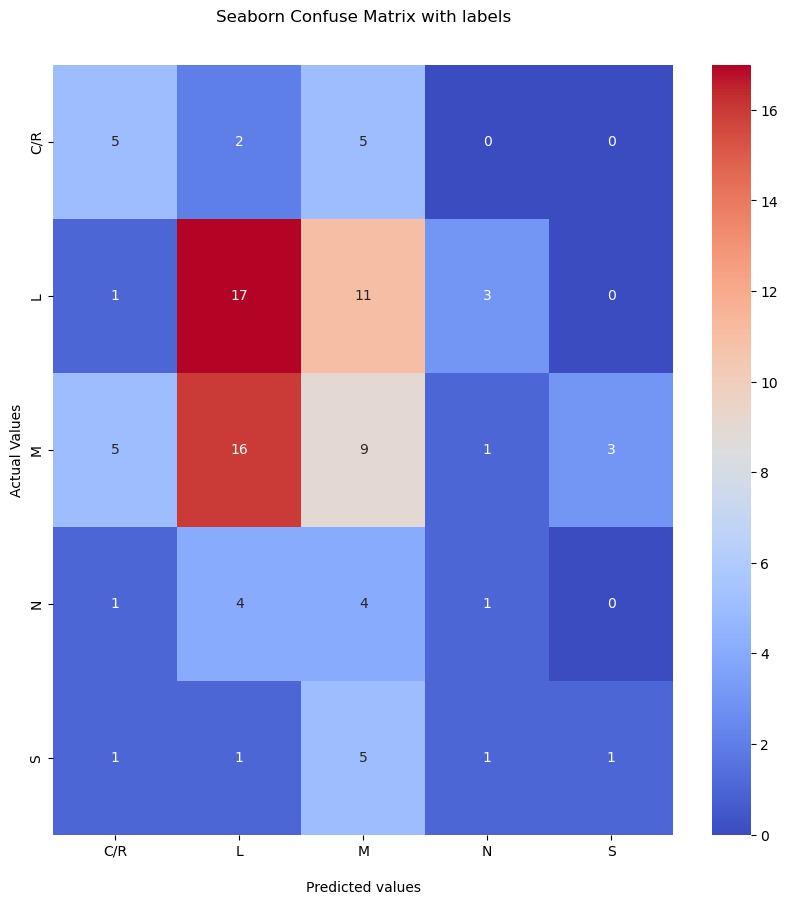

In [28]:
import seaborn as sns

fig = plt.figure(figsize=(10,10))
ax = sns.heatmap(cf_matrix, annot=True, cmap='coolwarm', fmt='.0f',
                xticklabels=labels, yticklabels=labels)

ax.set_title('Seaborn Confuse Matrix with labels\n\n');
ax.set_xlabel('\nPredicted values')
ax.set_ylabel('Actual Values');

In [29]:
# Hyperparameter Tuning

# Keras Tuner 

In [30]:
import keras_tuner as kt

In [31]:
def build_model(hp):
    model = Sequential()
    model.add(keras.layers.Flatten(input_shape=(12,)))
              
    hp_activation = hp.Choice('activation', values=['relu','tanh'])
    hp_layer_1 = hp.Int('layer_1', min_value=1, max_value=20, step=2)
              
    model.add(Dense(units=hp_layer_1, activation=hp_activation))
    model.add(Dense(5, activation='softmax'))
    
    optimizer = hp.Choice('optimizer', values=['adam','sgd','rmsprop','adadelta'])
    
    model.compile(optimizer=optimizer , loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

In [32]:
tuner = kt.Hyperband(build_model,
                     objective='val_accuracy',
                     max_epochs=5,
                     factor=3,
                     directory='dir',
                     project_name='hyperparameter_tuning')

Reloading Tuner from dir\hyperparameter_tuning\tuner0.json


In [33]:
tuner.search(X_train, y_train, epochs=5, validation_data=(X_test,y_test))

In [34]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

In [35]:
model = tuner.hypermodel.build(best_hps)

C:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [36]:
history = model.fit(X_train, y_train, batch_size=30, validation_split=0.2, epochs=50)

Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.2690 - loss: 1.7275 - val_accuracy: 0.1923 - val_loss: 1.8776
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2666 - loss: 1.6879 - val_accuracy: 0.2051 - val_loss: 1.8410
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2758 - loss: 1.6643 - val_accuracy: 0.2051 - val_loss: 1.8085
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2845 - loss: 1.6439 - val_accuracy: 0.2179 - val_loss: 1.7785
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2975 - loss: 1.6252 - val_accuracy: 0.2179 - val_loss: 1.7496
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2870 - loss: 1.6078 - val_accuracy: 0.2308 - val_loss: 1.7217
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2880 - loss: 1.5914 - val_accuracy: 0.2308 - val_loss: 1.6949
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2877 - loss: 1.5753 - val_accuracy: 0.2692 - val_loss

In [37]:
pd.DataFrame(history.history)

,accuracy,loss,val_accuracy,val_loss
0,0.240260,1.786372,0.192308,1.877575
1,0.246753,1.744938,0.205128,1.841022
2,0.256494,1.716239,0.205128,1.808527
3,0.266234,1.690970,0.217949,1.778523
4,0.285714,1.667530,0.217949,1.749588
5,0.275974,1.645742,0.230769,1.721723
6,0.275974,1.624979,0.230769,1.694927
7,0.275974,1.604973,0.269231,1.669437
8,0.282468,1.586404,0.282051,1.645333
9,0.288961,1.568928,0.282051,1.622819


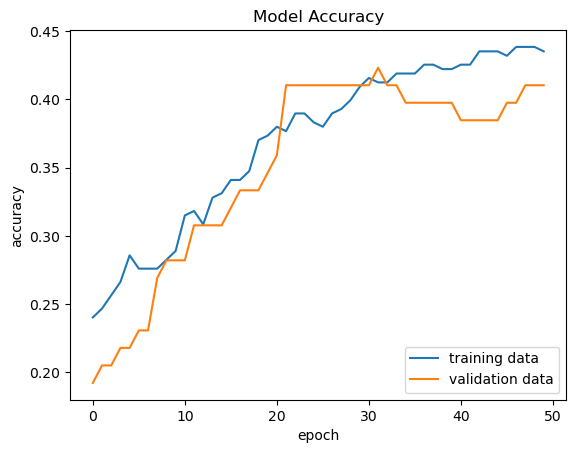

In [38]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc='lower right')

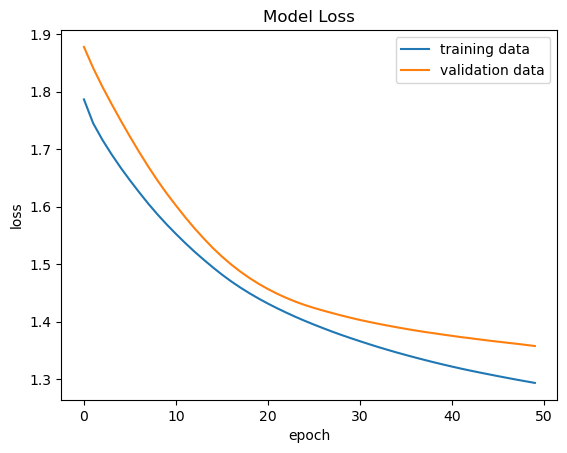

In [39]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc='upper right')

In [40]:
y_pred = model.predict(X_test)
y_pred_class = y_pred.argmax(axis=1)
y_test_class = y_test.idxmax(axis=1)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


In [41]:
cf_matrix = confusion_matrix(y_test_class, y_pred_class)

In [42]:
print(classification_report(y_test_class, y_pred_class))
print(confusion_matrix(y_test_class, y_pred_class))

              precision    recall  f1-score   support

           0       0.40      0.17      0.24        12
           1       0.39      0.50      0.44        32
           2       0.27      0.29      0.28        34
           3       0.31      0.40      0.35        10
           4       0.00      0.00      0.00         9

    accuracy                           0.33        97
   macro avg       0.27      0.27      0.26        97
weighted avg       0.30      0.33      0.31        97

[[ 2  2  8  0  0]
 [ 0 16 11  5  0]
 [ 3 18 10  2  1]
 [ 0  3  3  4  0]
 [ 0  2  5  2  0]]


In [43]:
labels = ['C/R', 'L', 'M', 'N', 'S']
labels.sort()

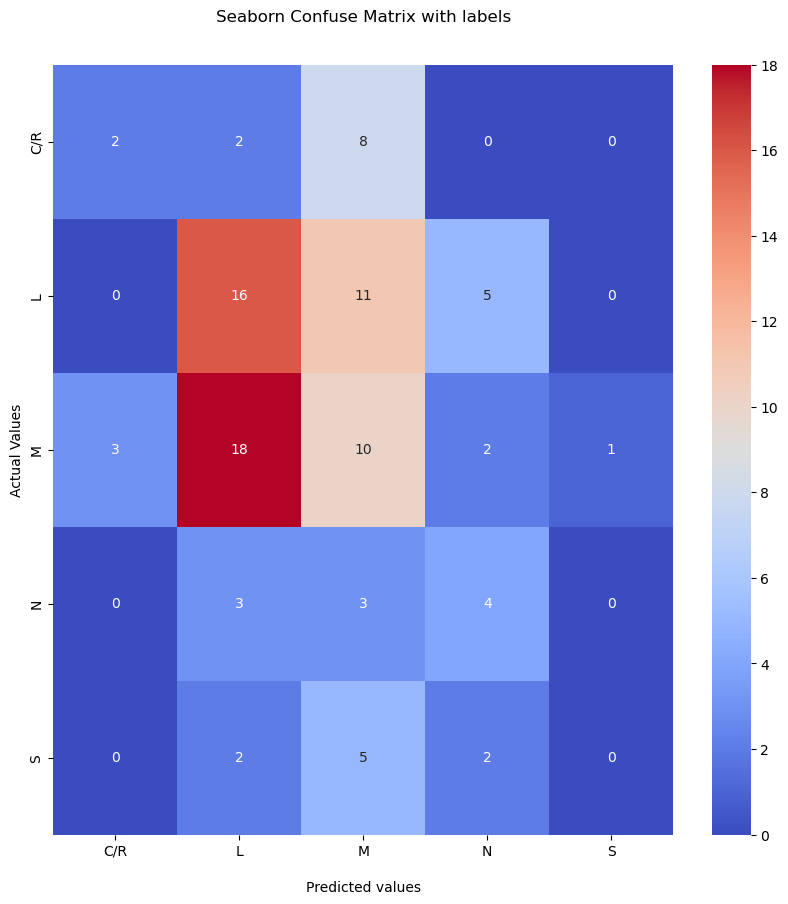

In [44]:
import seaborn as sns

fig = plt.figure(figsize=(10,10))
ax = sns.heatmap(cf_matrix, annot=True, cmap='coolwarm', fmt='.0f',
                xticklabels=labels, yticklabels=labels)

ax.set_title('Seaborn Confuse Matrix with labels\n\n');
ax.set_xlabel('\nPredicted values')
ax.set_ylabel('Actual Values');